In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib.colors import LogNorm

In [5]:
EXPERT_ID = 0
LAYER_ID = 0
PATH=f"/nfs/cyjiang/importance_maps/e{EXPERT_ID}_l{LAYER_ID}"

In [6]:
w1_grad, w2_grad, w3_grad = torch.load(f"{PATH}/weight_grad.pt")

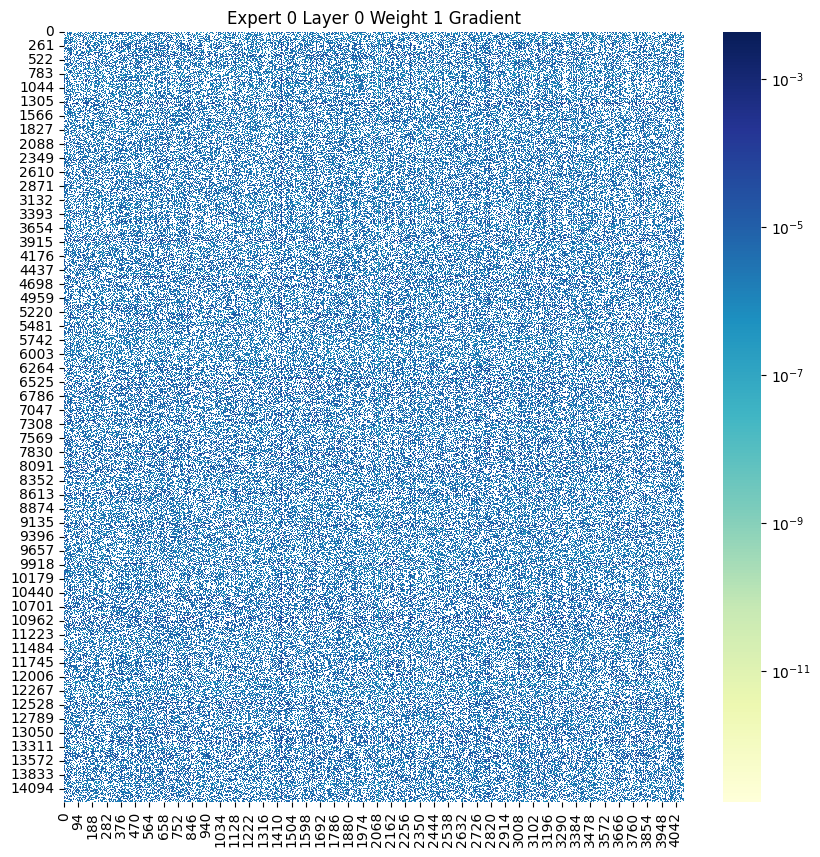

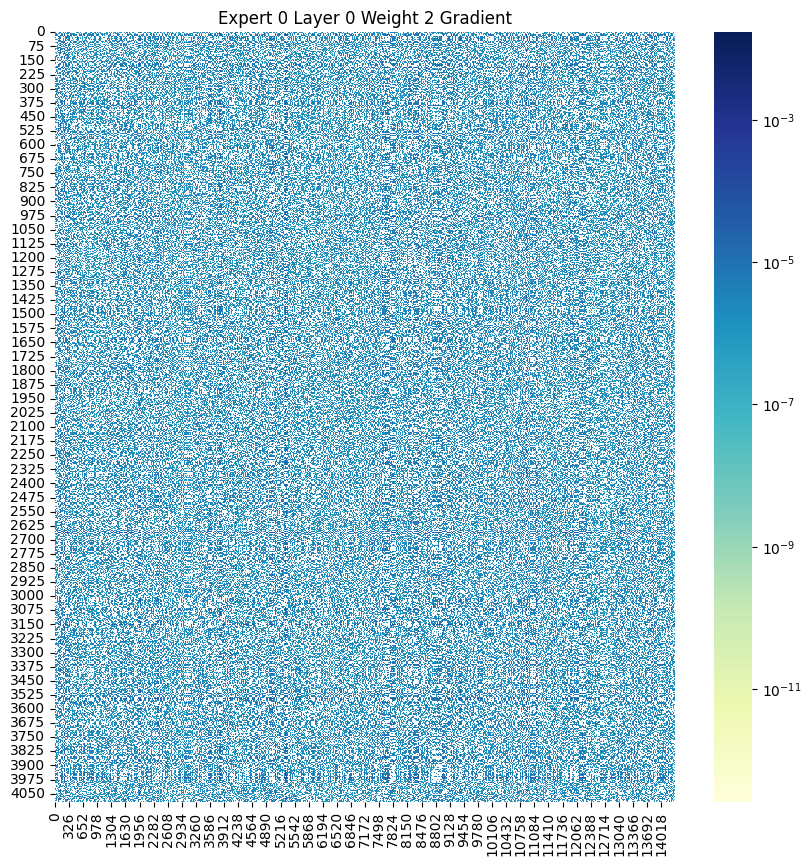

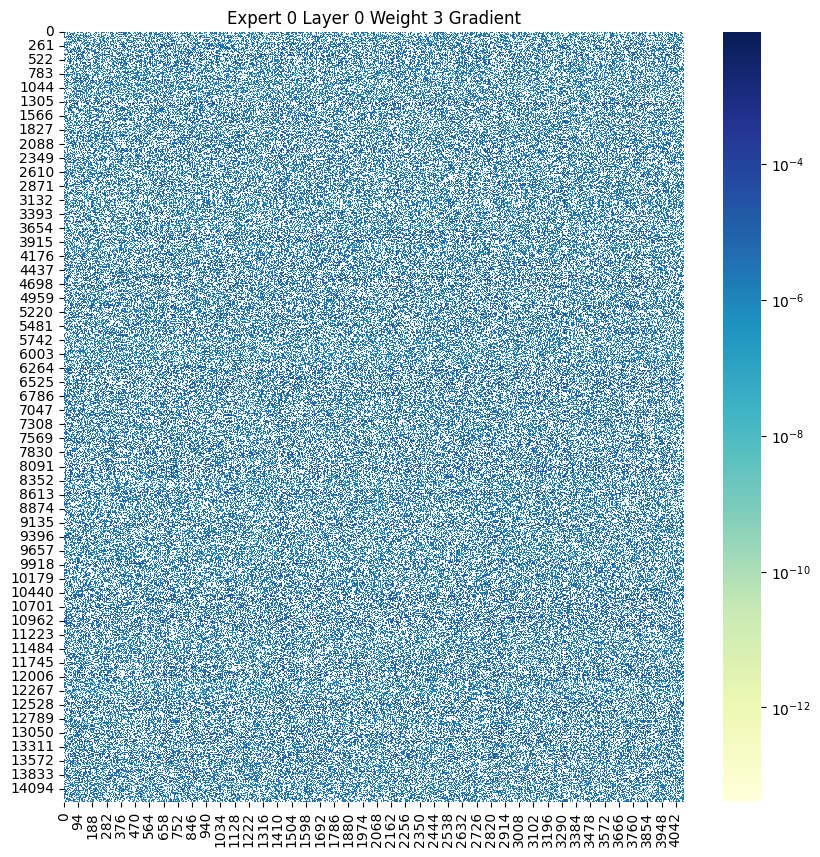

In [4]:
for i in range(3):
    grad_cpu = [w1_grad, w2_grad, w3_grad][i].cpu().float().numpy()
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(grad_cpu, cmap="YlGnBu", ax=ax, norm=LogNorm())
    ax.set_title(f"Expert {EXPERT_ID} Layer {LAYER_ID} Weight {i+1} Gradient")
    fig.savefig(f"{PATH}/weight_{i+1}_grad.png", bbox_inches='tight')

In [8]:
# plot histogram
for i in range(3):
    grad = [w1_grad, w2_grad, w3_grad][i]
    # flatten and sort
    grad, _ = torch.sort(grad.reshape(-1))
    grad_cpu = grad.cpu().float().numpy()
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.lineplot(grad_cpu, ax=ax)
    ax.set_title(f"Expert {EXPERT_ID} Layer {LAYER_ID} Weight {i+1} Gradient")
    fig.savefig(f"{PATH}/weight_{i+1}_grad_line.png", bbox_inches='tight')

AttributeError: 'torch.return_types.sort' object has no attribute 'cpu'

In [4]:
input_grad = torch.load(f"{PATH}/input_grad.pt")